In [1]:
import os
import torch
import scipy.stats as stats
import numpy as np

# CODE FILES HERE
from models.vae.vae import Encoder, Decoder, Vae, MODEL_NAME
from solver import Solver
from directories import Directories
from dataloader import DataLoader
from plot import plot_losses, plot_gaussian_distributions, plot_rl_kl, plot_latent_space, \
plot_latent_manifold, plot_faces_grid, plot_faces_samples_grid

# SETTINGS HERE
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # to see the CUDA stack
%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
# supress cluttering warnings in solutions
import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting device on GPU if available, else CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

# Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cpu



In [46]:
# Choose the dataset and tune hyperparameters here!
dataset = "FF"

batch_size = 128
optimizer = torch.optim.Adam

if dataset == "MNIST":
    epochs = 100
    hidden_dim = 500
    z_dim = 20
    beta = 10 if z_dim == 2 else 10
    batch_norm = False
    lr_scheduler = torch.optim.lr_scheduler.StepLR
    step_config = {
        "step_size" : 200,
        "gamma" : 0.1 # or 0.75
    }
    optim_config = {
        "lr": 1e-3,
        "weight_decay": None
    }
elif dataset == "LFW":
    epochs = 10
    hidden_dim = 700
    z_dim = 2
    beta = 1 if z_dim == 2 else 1
    batch_norm = True
    lr_scheduler = torch.optim.lr_scheduler.StepLR
    step_config = {
        "step_size" : 30,
        "gamma" : 0.1
    }
    optim_config = {
        "lr": 1e-2,
        "weight_decay": None
    }
elif dataset == "FF":
    epochs = 100
    hidden_dim = 200
    z_dim = 2
    beta = 1
    batch_norm = False
    lr_scheduler = torch.optim.lr_scheduler.StepLR
    step_config = {
        "step_size" : 300,
        "gamma" : 0.1
    }
    optim_config = {
        "lr": 1e-2,
        "weight_decay": None
    }

In [47]:
directories = Directories(MODEL_NAME, dataset, z_dim)
data_loader = DataLoader(directories, batch_size, dataset)
model = Vae(data_loader.input_dim, hidden_dim, z_dim, batch_norm)
solver = Solver(model, data_loader, optimizer, z_dim, epochs, beta, step_config, optim_config, lr_scheduler=lr_scheduler)
solver.main()

+++++ START RUN | saved files in vae/FF_z=2_4 +++++
====> Epoch: 1 train set loss avg: 458.2698
====> Test set loss avg: 392.7900
0.37 seconds for epoch 1
====> Epoch: 2 train set loss avg: 359.9697
====> Test set loss avg: 350.1373
0.39 seconds for epoch 2
====> Epoch: 3 train set loss avg: 347.6038
====> Test set loss avg: 350.8770
0.37 seconds for epoch 3
====> Epoch: 4 train set loss avg: 345.9680
====> Test set loss avg: 348.6016
0.38 seconds for epoch 4
====> Epoch: 5 train set loss avg: 345.6580
====> Test set loss avg: 347.4873
0.39 seconds for epoch 5
====> Epoch: 6 train set loss avg: 345.2063
====> Test set loss avg: 346.8047
0.37 seconds for epoch 6
====> Epoch: 7 train set loss avg: 345.0148
====> Test set loss avg: 346.0132
0.38 seconds for epoch 7
====> Epoch: 8 train set loss avg: 344.7963
====> Test set loss avg: 345.3216
0.48 seconds for epoch 8
====> Epoch: 9 train set loss avg: 344.6043
====> Test set loss avg: 345.0982
0.54 seconds for epoch 9
====> Epoch: 10 train

====> Epoch: 79 train set loss avg: 341.2561
====> Test set loss avg: 343.4562
0.42 seconds for epoch 79
====> Epoch: 80 train set loss avg: 341.2922
====> Test set loss avg: 343.0783
0.45 seconds for epoch 80
====> Epoch: 81 train set loss avg: 341.2065
====> Test set loss avg: 343.2606
0.43 seconds for epoch 81
====> Epoch: 82 train set loss avg: 341.2323
====> Test set loss avg: 343.1849
0.55 seconds for epoch 82
====> Epoch: 83 train set loss avg: 341.2213
====> Test set loss avg: 343.6933
0.55 seconds for epoch 83
====> Epoch: 84 train set loss avg: 341.3110
====> Test set loss avg: 343.2063
0.45 seconds for epoch 84
====> Epoch: 85 train set loss avg: 341.1699
====> Test set loss avg: 343.8444
0.45 seconds for epoch 85
====> Epoch: 86 train set loss avg: 341.1581
====> Test set loss avg: 343.6974
0.44 seconds for epoch 86
====> Epoch: 87 train set loss avg: 341.0826
====> Test set loss avg: 343.5106
0.45 seconds for epoch 87
====> Epoch: 88 train set loss avg: 341.1337
====> Test

In [ ]:
# Insert name of model here if want to load a model, e.g. solver.save_model_dir + "/VAE_MNIST_train_loss=151.39_z=2.pt"
#solver = torch.load(solver.save_model_dir + "/VAE_MNIST_train_loss=97.15_z=20.pt")
#solver.model.eval()

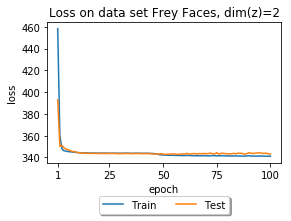

In [48]:
# Plotting train and test losses for all epochs
plot_losses(solver)

epoch: 1, mu(z): 0.1385, stddev(z): 1.1236, var(z): 1.2624, var(mu(z)): 0.0061 E[var(q(z|x)]: 0.2435
epoch: 26, mu(z): 0.0070, stddev(z): 0.9525, var(z): 0.9073, var(mu(z)): 0.0008 E[var(q(z|x)]: 0.8893
epoch: 51, mu(z): 0.0082, stddev(z): 0.9574, var(z): 0.9167, var(mu(z)): 0.4347 E[var(q(z|x)]: 0.4620
epoch: 100, mu(z): 0.0234, stddev(z): 0.9756, var(z): 0.9517, var(mu(z)): 0.4809 E[var(q(z|x)]: 0.4941


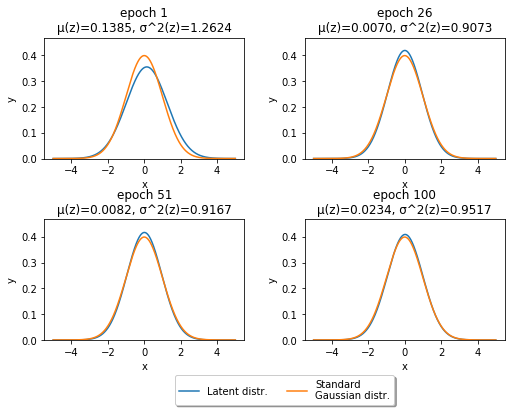

In [49]:
# Plotting the gaussian of z space and some metrics about the space
plot_gaussian_distributions(solver)

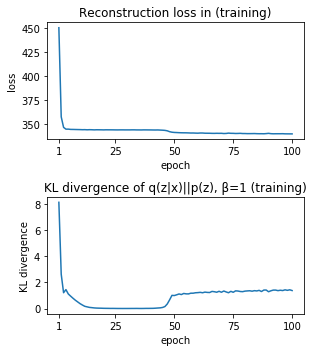

In [50]:
# Monitoring the reconstruction loss (likelihood lower bound) and KL divergence
DEBUG = 0
if DEBUG:
    for epoch, train_loss, test_loss, rl, kl in zip(solver.train_loss_history["epochs"], \
                             solver.train_loss_history["train_loss_acc"], \
                             solver.test_loss_history, \
                             solver.train_loss_history["recon_loss_acc"], \
                             solver.train_loss_history["kl_diverg_acc"]):
        print("epoch: {}, train_loss: {:.2f}, test_loss: {:.2f}, recon. loss: {:.2f}, KL div.: {:.2f}".format(
            epoch, train_loss, test_loss, rl, kl))
        print("overfitting: {:.2f}".format(abs(test_loss-train_loss)))
plot_rl_kl(solver)

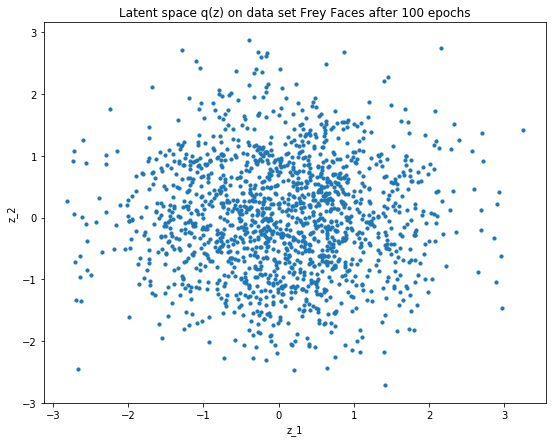

In [51]:
# visualize q(z) (latent space z)
if solver.z_dim == 2:
    if solver.data_loader.with_labels:
        plot_latent_space(solver, solver.z_space, var="z", title="classes", labels=solver.data_labels)
    else:
        plot_latent_space(solver, solver.z_space, var="z")
else:
    print("Plot of latent space not possible as dimension of z is not 2")

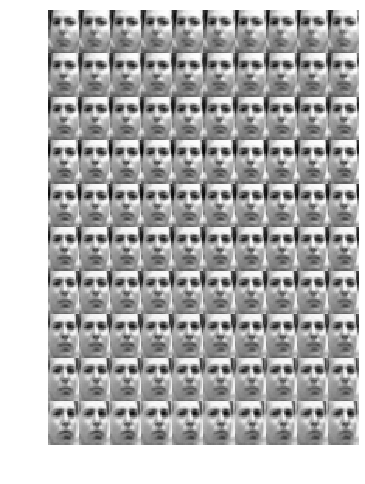

In [52]:
# Visualizations of learned data manifold for generative models with two-dimensional latent space
if solver.z_dim == 2:
    if solver.data_loader.dataset == "MNIST":
        n = 20
        grid_x = stats.norm.ppf(np.linspace(0.05, 0.95, n))
        grid_y = stats.norm.ppf(np.linspace(0.05, 0.95, n))
        plot_latent_manifold(solver, "bone", grid_x, grid_y, n)
    if solver.data_loader.dataset == "LFW" or solver.data_loader.dataset == "FF":
        n = 10
        grid_x = stats.norm.ppf(np.linspace(0.05, 0.95, n))
        grid_y = stats.norm.ppf(np.linspace(0.05, 0.95, n))
        plot_latent_manifold(solver, "gray", grid_x, grid_y, n, fig_size=(10, 8))
else:
    print("Plot is not possible as dimension of z is not 2")

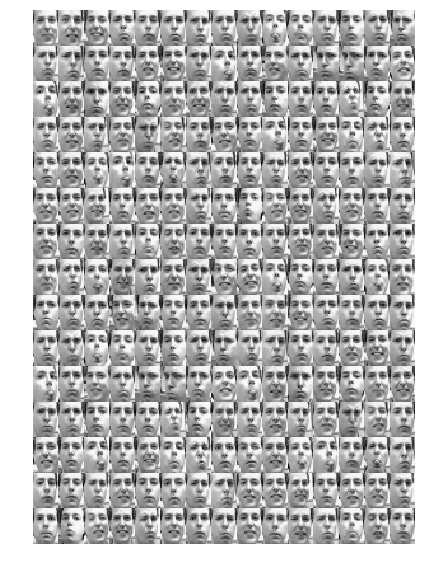

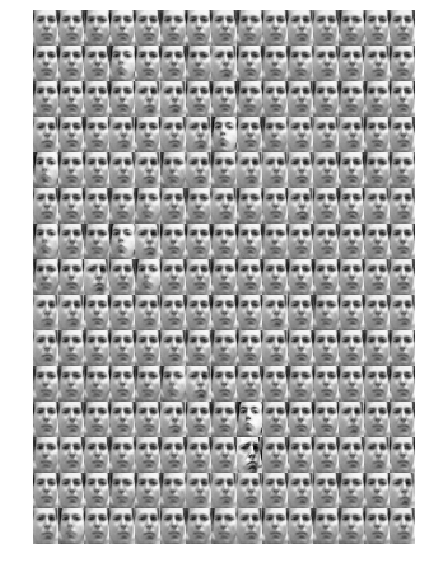

In [53]:
# plots real faces and in grid samples
if solver.data_loader.dataset == "LFW":
    to_data = next(iter(solver.data_loader.train_loader))[0].numpy()
elif solver.data_loader.dataset == "FF":
    to_data = next(iter(solver.data_loader.train_loader)).numpy()
plot_faces_grid(225, 15, solver, to_data)
plot_faces_samples_grid(225, 15, solver)

In [ ]:
last_train_loss = solver.train_loss_history["train_loss_acc"][-1]
torch.save(solver, solver.data_loader.result_dir + "/model_VAE_" + solver.data_loader.dataset + "_train_loss=" + "{0:.2f}".format(last_train_loss) + "_z=" + str(solver.z_dim) + ".pt")